In [171]:
%matplotlib inline 
import itertools
import matplotlib
import matplotlib.pyplot as plt
import os
import re
import sys

from collections import defaultdict
from sklearn import metrics

In [172]:
import seaborn as sns
sns.set_style('white')
sns.set_palette('colorblind')

In [173]:
module_path = os.path.abspath('..')
if module_path not in sys.path:
    sys.path.append(module_path)
from preprocess import essay_documents, process_arg_essays_for_conll

In [174]:
ANNOTATIONS_DIR = '/home/milagro/FaMAF/am/third_party/brat-v1.3_Crunchy_Frog/data/'
ANNOTATORS = {
    'mili': {'dirname': 'judgements-mili'},
    # 'laura': {'dirname': 'judgements-laura'},
    'serena': {'dirname': 'judgements-serena'}
}
ANNOTATION_FORMAT = r'.*\.ann'
BRAT_DIRNAME = '/home/milagro/FaMAF/am/third_party/brat/'
STYLES = {'claim': '__', 'major-claim': '***', 'premise': '`'}

### Find files to compare

In [175]:
def get_non_empty_files(input_dirpath, pattern, size_limit=500):
    """Returns the names of the files in input_dirpath matching pattern."""
    all_files = os.listdir(input_dirpath)
    result = {}
    for filename in all_files:
        if not re.match(pattern, filename):
            continue
        filepath = os.path.join(input_dirpath, filename)
        if os.path.isfile(filepath) and os.stat(filepath).st_size > 500:
            result[filename] = filepath
    return result

In [176]:
files = defaultdict(lambda: {})
for name, annotator in ANNOTATORS.items():
    annotator['files'] = get_non_empty_files(os.path.join(ANNOTATIONS_DIR, annotator['dirname']),
                                             ANNOTATION_FORMAT)
    for filename, filepath in annotator['files'].items():
        files[filename][name] = filepath

In [177]:
ANNOTATORS

{'mili': {'dirname': 'judgements-mili',
  'files': {'CASE_OF__ALKASI_v._TURKEY.ann': '/home/milagro/FaMAF/am/third_party/brat-v1.3_Crunchy_Frog/data/judgements-mili/CASE_OF__ALKASI_v._TURKEY.ann',
   'CASE_OF__BARCZA_AND_OTHERS_v_HUNGARY.ann': '/home/milagro/FaMAF/am/third_party/brat-v1.3_Crunchy_Frog/data/judgements-mili/CASE_OF__BARCZA_AND_OTHERS_v_HUNGARY.ann'}},
 'serena': {'dirname': 'judgements-serena',
  'files': {'CASE_OF__ALKASI_v._TURKEY.ann': '/home/milagro/FaMAF/am/third_party/brat-v1.3_Crunchy_Frog/data/judgements-serena/CASE_OF__ALKASI_v._TURKEY.ann'}}}

In [178]:
dict(files)

{'CASE_OF__ALKASI_v._TURKEY.ann': {'mili': '/home/milagro/FaMAF/am/third_party/brat-v1.3_Crunchy_Frog/data/judgements-mili/CASE_OF__ALKASI_v._TURKEY.ann',
  'serena': '/home/milagro/FaMAF/am/third_party/brat-v1.3_Crunchy_Frog/data/judgements-serena/CASE_OF__ALKASI_v._TURKEY.ann'},
 'CASE_OF__BARCZA_AND_OTHERS_v_HUNGARY.ann': {'mili': '/home/milagro/FaMAF/am/third_party/brat-v1.3_Crunchy_Frog/data/judgements-mili/CASE_OF__BARCZA_AND_OTHERS_v_HUNGARY.ann'}}

Find pairs of files annotated for more than one annotator.

In [179]:
from imp import reload
reload(process_arg_essays_for_conll)
reload(essay_documents)

<module 'preprocess.essay_documents' from '/home/milagro/FaMAF/am/argument_mining/preprocess/essay_documents.py'>

In [180]:
document_pairs = []
for value in files.values():
    if len(value) < 2:
        continue
    annotations = {}
    for name, filename in value.items():
        identifier = 'Case: {} - Ann: {}'.format(
            os.path.basename(filename[:-4]).replace('CASE_OF__', '').replace('_', ' '),
            name[0].title())
        with process_arg_essays_for_conll.EssayDocumentFactory(
                filename.replace('ann', 'txt'), identifier) as instance_extractor:
            annotations[name] = instance_extractor.build_document()
    for ann1, ann2 in list(itertools.combinations(annotations.keys(), 2)):
        document_pairs.append((annotations[ann1], annotations[ann2]))

In [181]:
document_pairs

[(Case: ALKASI v. TURKEY - Ann: S, Case: ALKASI v. TURKEY - Ann: M)]

In [182]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

In [183]:
print(document_pairs[0][0].identifier)
printmd(document_pairs[0][0].sample_labeled_text(limit=35, styles=STYLES))
printmd('---')
print(document_pairs[0][1].identifier)
printmd(document_pairs[0][1].sample_labeled_text(limit=35, styles=STYLES))

Case: ALKASI v. TURKEY - Ann: S


Relying on Article 6 of the Convention , the applicant complains that __the__ __labour__ __court’s__ __dismissal__ __of__ __her__ __claim__ __for__ __compensation__ __against__ __her__ __former__ __employer__ __amounted__ __to__ __a__ __violation__ __of__ __her__ __right__ __to__ __be__ __presumed__ __innocent__ , in that `the` `labour` `court` `found` `that` `she` `had` `broken` `her` `employer’s` `trust` `by` `committing` `the` offence `of` `incitement` . 

The applicant argues that ***the*** ***labour*** ***court’s*** ***complete*** ***disregard*** ***of*** ***her*** ***acquittal*** ***in*** ***relation*** ***to*** ***the*** ***charge*** ***of*** ***incitement*** ***is*** ***incompatible*** ***with*** ***the*** ***requirements*** ***of*** ***Article*** ***6*** ***§*** ***2*** ***of*** ***the*** ***Convention*** . 

She further claims that __the__ __Bakırköy__ __Labour__ __Court__ __based__ __its__ __decision__ on __self-incriminating__ __statements__ __which__ __she__ __had__ __given__ __to__ __the__ __police__ __in__ __the__ __absence__ __of__ __her__ __lawyer__ . 

Being the master of the characterisation to be given in law to the facts of the case , the Court considers that __the__ __applicant’s__ __grievances__ __fall__ __to__ __be__ __examined__ __solely__ __under__ __Article__ __6__ __§__ __2__ __of__ __the__ __Convention__ which reads as follows : 



---

Case: ALKASI v. TURKEY - Ann: M


Relying on Article 6 of the Convention , the applicant complains that __the__ __labour__ __court’s__ __dismissal__ __of__ __her__ __claim__ __for__ __compensation__ __against__ __her__ __former__ __employer__ __amounted__ __to__ __a__ __violation__ __of__ __her__ __right__ __to__ __be__ __presumed__ __innocent__ , in that `the` `labour` `court` `found` `that` `she` `had` `broken` `her` `employer’s` `trust` `by` `committing` `the` offence `of` `incitement` . 

The applicant argues that ***the*** ***labour*** ***court’s*** ***complete*** ***disregard*** ***of*** ***her*** ***acquittal*** ***in*** ***relation*** ***to*** ***the*** ***charge*** ***of*** ***incitement*** ***is*** ***incompatible*** ***with*** ***the*** ***requirements*** ***of*** ***Article*** ***6*** ***§*** ***2*** ***of*** ***the*** ***Convention*** . 

She further claims that __the__ __Bakırköy__ __Labour__ __Court__ __based__ __its__ __decision__ on __self-incriminating__ __statements__ __which__ __she__ __had__ __given__ __to__ __the__ __police__ __in__ __the__ __absence__ __of__ __her__ __lawyer__ . 

Being the master of the characterisation to be given in law to the facts of the case , the Court considers that __the__ __applicant’s__ __grievances__ __fall__ __to__ __be__ __examined__ __solely__ __under__ __Article__ __6__ __§__ __2__ __of__ __the__ __Convention__ which reads as follows : 



# Compare document annotations

In [184]:
def show_kappa(labels1, labels2):
    kappa = metrics.cohen_kappa_score(labels1, labels2)
    print('{} - {}: {}'.format(
        doc1.identifier.split('-')[1].strip(),
        doc2.identifier.split('-')[1].strip(),
        kappa))

In [185]:
def show_confusion_matrix(labels1, labels2, identifier1=None, identifier2=None):
    label_names = list(set(labels1))
    matrix = metrics.confusion_matrix(labels1, labels2, labels=label_names)
    figure = sns.heatmap(matrix, annot=True, fmt="d", linewidths=.5,
                         xticklabels=label_names, yticklabels=label_names)
    if identifier1 is not None:
        figure.set(ylabel=identifier1)
    if identifier2 is not None:
        figure.set(xlabel=identifier2)
    plt.show()

## Sentence level comparison

We compare the agreement on classifying argumentative vs non argumentative sentences

Ann: S - Ann: M: 0.5761856710393543


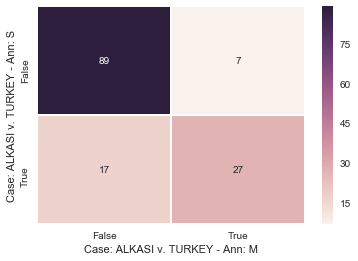

In [186]:
def get_argumentative_sentences(document):
    return [sentence.has_label for sentence in document.sentences]

for doc1, doc2 in document_pairs:
    labels1 = get_argumentative_sentences(doc1)
    labels2 = get_argumentative_sentences(doc2)
    show_kappa(labels1, labels2)
    show_confusion_matrix(labels1, labels2, doc1.identifier, doc2.identifier)

## Token level comparison

In [187]:
def get_labels(doc1, doc2):
    words1, labels1 = doc1.get_word_label_list()
    words2, labels2 = doc2.get_word_label_list()
    # Check the documents are equal
    assert words1 == words2
    return labels1, labels2

Kappa agreement using labels `claim`, `major-claim` and `premise`

Ann: S - Ann: M: 0.35618580948745837


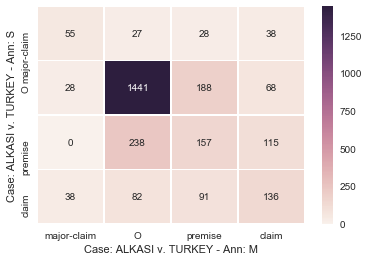

In [188]:
for doc1, doc2 in document_pairs:
    labels1, labels2 = get_labels(doc1, doc2)
    show_kappa(labels1, labels2)
    show_confusion_matrix(labels1, labels2, doc1.identifier, doc2.identifier)

Kappa agreement using only labels `claim` and `premise`

Ann: S - Ann: M: 0.5468929888071954


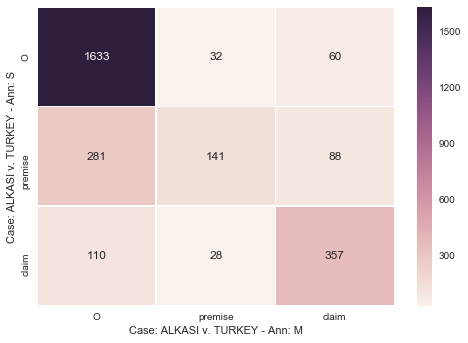

In [155]:
for doc1, doc2 in document_pairs:
    labels1, labels2 = get_labels(doc1, doc2)
    labels1 = [x if x != 'major-claim' else 'claim' for x in labels1]
    labels2 = [x if x != 'major-claim' else 'claim' for x in labels2]
    show_kappa(labels1, labels2)
    show_confusion_matrix(labels1, labels2, doc1.identifier, doc2.identifier)

## Qualitative error analysis

In [144]:
def sample_sentences(doc1, doc2, label1, label2):
    """Samples sentences where label1 was confused with label2 in doc1 and doc2 respectively."""
    total_errors = 0
    for sentence1, sentence2 in zip(doc1.sentences, doc2.sentences):
        indices1 = [i for i, x in enumerate(sentence1.labels) if x == label1]
        if len(indices1) == 0:
            continue
        indices2 = [i for i, x in enumerate(sentence2.labels) if x == label2]
        if len(indices2) == 0 or len(set(indices1).intersection(indices2)) == 0:
            continue
        total_errors += len(set(indices1).intersection(indices2))
        # Print both sentences
        printmd(sentence1.pretty_print(styles=STYLES))
        printmd(sentence2.pretty_print(styles=STYLES))
        printmd('---')
    print('TOTAL ERRORS:', total_errors)

Examples labeled as `premise` in one document and as `O` in the other

In [145]:
sample_sentences(document_pairs[0][0], document_pairs[0][1], 'premise', 'O')

However , in all cases and regardless of which approach applied , `the` `language` `used` `by` `a` `decision` `maker` `would` `be` `of` `critical` `importance` `in` `assessing` `the` `compatibility` `of` `the` `decision` `and` `its` `reasoning` `with` `Article` `6` `§` `2` ( ibid. , §§ 125 and 126 ) . 

However , in all cases and regardless of which approach applied , the language used by a decision maker would be of critical importance in assessing the compatibility of the decision and its reasoning with Article 6 § 2 ( ibid. , §§ 125 and 126 ) . 

---

The Court notes that `the` `parties` `do` `not` `dispute` `the` `fact` `that` `the` `termination` `of` `the` `applicant’s` `employment` `was` `directly` `related` `to` `the` `events` `leading` `to` `the` `criminal` `proceedings` . 

The Court notes that the parties do not dispute the fact that the termination of the applicant’s employment was directly related to the events leading to the criminal proceedings . 

---

The Court observes at the outset that `the` `nature` `of` `the` `labour` `court’s` `task` `was` `to` `assess` `whether` the `termination` `of` `the` `applicant’s` `employment` `had` `been` `justified` `,` `and` `whether` the `applicant` `should` `have` `received` `notice` `and` `severance` `pay` `upon` `termination` `of` `her` `employment` `contract` . 

The Court observes at the outset that the nature of the labour court’s task was to assess whether the termination of the applicant’s employment had been justified , and whether the applicant should have received notice and severance pay upon termination of her employment contract . 

---

In other words , `the` `Bakırköy` `Labour` `Court` , as a civil court not bound by the findings or result of the criminal proceedings , `was` `at` `liberty` `to` `determine` `the` `dispute` `from` `a` `labour` `law` `perspective` . 

In other words , the Bakırköy Labour Court , as a civil court not bound by the findings or result of the criminal proceedings , was at liberty to determine the dispute from a labour law perspective . 

---

The Court recalls in that respect that __even__ __exoneration__ __from__ __criminal__ __responsibility__ __does__ __not__ __,__ __as__ __such__ __,__ __preclude__ __the__ __establishment__ __of__ __civil__ __or__ __other__ __forms__ __of__ __liability__ __arising__ __out__ __of__ __the__ __same__ __facts__ __on__ __the__ __basis__ __of__ __a__ __less__ __strict__ __burden__ __of__ __proof__ ( see , for example , `Ringvold` `v.` `Norway` `,` `no` `.` 

The Court recalls in that respect that even exoneration from criminal responsibility does not , as such , preclude the establishment of civil or other forms of liability arising out of the same facts on the basis of a less strict burden of proof ( see , for example , Ringvold v. Norway , no . 

---

`34964/97` `,` `§` `38` `,` `ECHR` `2003‑II` `,` `and` `Vella` `v.` `Malta` `,` `no` `.` 

34964/97 , § 38 , ECHR 2003‑II , and Vella v. Malta , no . 

---

`69122/10` `,` `§` `56` `,` `11` `February` `2014` ) . 

69122/10 , § 56 , 11 February 2014 ) . 

---

However , in order to comply with the right guaranteed under Article 6 § 2 of the Convention , ***the*** ***national*** ***courts*** ***in*** ***the*** ***subsequent*** ***proceedings*** ***need*** ***to*** ***stay*** ***within*** ***the*** ***bounds*** ***of*** ***a*** ***civil*** ***forum*** ***and*** ***refrain*** ***from*** ***suggesting*** ***criminal*** ***characterization*** ***of*** ***the*** ***applicant’s*** ***conduct*** ( see , inter alia , `Teodor` `v.` `Romania` `,` `no` `.` 

However , in order to comply with the right guaranteed under Article 6 § 2 of the Convention , the national courts in the subsequent proceedings need to stay within the bounds of a civil forum and refrain from suggesting criminal characterization of the applicant’s conduct ( see , inter alia , Teodor v. Romania , no . 

---

`46878/06` `,` `§` `44` `,` `4` `June` `2013` `,` `and` `N.A` . 

46878/06 , § 44 , 4 June 2013 , and N.A . 

---

`v.` `Norway` `,` `no` `.` 

v. Norway , no . 

---

`27473/11` `,` `§` `46` `,` `18` `December` `2014` ) . 

27473/11 , § 46 , 18 December 2014 ) . 

---

The court notes that , although `the` `Bakırköy` `Labour` `Court` `was` `empowered` `to` `make` a `fresh` `assessment` `of` `the` `facts` , `it` `based` `its` `reasoning` `to` `a` `large` `extent` `on` `the` `criminal` `file` `,` `and` `concluded` `that` `the` `applicant` `had` `indeed` `committed` `the` offence `of` `incitement` , when in fact `she` `had` `been` `acquitted` `of` `the` `same` `offence` `by` `the` `criminal` `courts` . 

The court notes that , although the Bakırköy Labour Court was empowered to make a fresh assessment of the facts , it __based__ __its__ __reasoning__ __to__ __a__ __large__ __extent__ __on__ __the__ __criminal__ __file__ , and __concluded__ __that__ __the__ __applicant__ __had__ __indeed__ __committed__ __the__ offence __of__ __incitement__ __,__ __when__ __in__ __fact__ __she__ __had__ __been__ __acquitted__ __of__ __the__ __same__ __offence__ __by__ __the__ __criminal__ __courts__ . 

---

The Court notes in this context that it has already found that `the` `use` `as` `evidence` `for` `a` `criminal` `conviction` `of` `statements` `given` `by` `the` `accused` `to` `the` `police` `without` `the` `assistance` `of` `a` `lawyer` `may` `amount` `to` `a` `violation` `of` `Article` `6` `§` `1` `of` `the` `Convention` ( see `Salduz` `v.` `Turkey` `[` `GC` `]` `,` `no` `.` 

The Court notes in this context that it has already found that `the` `use` `as` `evidence` `for` `a` `criminal` `conviction` `of` `statements` `given` `by` `the` `accused` `to` `the` `police` `without` `the` `assistance` `of` `a` `lawyer` `may` `amount` `to` `a` `violation` `of` `Article` `6` `§` `1` `of` `the` `Convention` ( see Salduz v. Turkey [ GC ] , no . 

---

`36391/02` `,` `§§` `56-62` `,` `ECHR` `2008` ) . 

36391/02 , §§ 56-62 , ECHR 2008 ) . 

---

The Court further notes that `the` `labour` `court` `in` `its` `judgment` `referred` `to` `the` `fact` `that` `the` `applicant’s` `employer` `had` `relied` `on` `the` `fact` `that` `the` `applicant` `had` `confessed` `to` `inciting` `M.G` . 

The Court further notes that the labour court in its judgment referred to the fact that the applicant’s employer had relied on the fact that the applicant had confessed to inciting M.G . 

---

`into` `committing` `the` `crime` , and that `the` `labour` `court` `explicitly` `stated` `that` `it` `had` `examined` `the` `entire` `criminal` `investigation` `file` ( see paragraph 14 above ) . 

into committing the crime , and that the labour court explicitly stated that it had examined the entire criminal investigation file ( see paragraph 14 above ) . 

---

The applicant claimed `3,500` `Turkish` `liras` `(` `TRL` `–` `approximately` `1,200` `euros` `(` `EUR` ) `)` `plus` `statutory` `interest` `accrued` `on` `that` `sum` `in` `respect` `of` `pecuniary` `damage` . 

The applicant claimed 3,500 Turkish liras ( TRL – approximately 1,200 euros ( EUR ) ) plus statutory interest accrued on that sum in respect of pecuniary damage . 

---

She claimed that that `was` `the` `sum` `she` `was` `due` `in` `respect` `of` `severance` `and` `notice` `pay` `under` `the` `national` `legislation` , which had been calculated by an expert witness in the course of the domestic proceedings . 

She claimed that that was the sum she was due in respect of severance and notice pay under the national legislation , which had been calculated by an expert witness in the course of the domestic proceedings . 

---

TOTAL ERRORS: 281


In [146]:
sample_sentences(document_pairs[0][0], document_pairs[0][1], 'O', 'premise')

The second aspect of the protection afforded by Article 6 § 2 requires that a ***person*** ***must*** ***be*** ***treated*** ***in*** ***a*** ***manner*** ***that*** ***is*** ***consistent*** ***with*** ***his*** ***or*** ***her*** ***innocence*** ***after*** ***the*** ***conclusion*** ***of*** ***criminal*** ***proceedings*** ***which*** ***have*** ***terminated*** in ***an*** ***acquittal*** ***or*** ***discontinuation*** ( ibid. , § 103 ) . 

The second aspect of the protection afforded by Article 6 § 2 requires that a `person` `must` `be` `treated` `in` `a` `manner` `that` `is` `consistent` `with` `his` `or` `her` `innocence` `after` `the` `conclusion` `of` `criminal` `proceedings` `which` `have` `terminated` in `an` `acquittal` `or` `discontinuation` `(` `ibid.` `,` `§` `103` `)` . 

---

Any statement or reasoning by a civil court calling into question the applicant’s established innocence would be incompatible with the requirements of Article 6 § 2 . 

`Any` `statement` `or` `reasoning` `by` `a` `civil` `court` `calling` `into` `question` `the` `applicant’s` `established` `innocence` `would` `be` `incompatible` `with` `the` `requirements` `of` `Article` `6` `§` `2` . 

---

TOTAL ERRORS: 32


In [87]:
sample_sentences(document_pairs[0][0], document_pairs[0][1], 'claim', 'O')

---

Viewed as a procedural guarantee in the context of a criminal trial itself , __the__ __presumption__ __of__ __innocence__ __imposes__ __requirements__ __in__ __respect__ __of__ __,__ __inter__ __alia__ __,__ __the__ __burden__ __of__ __proof__ __,__ __legal__ __presumptions__ __of__ __fact__ __and__ __law__ __,__ __the__ __privilege__ __against__ __self-incrimination__ __,__ __pre-trial__ __publicity__ __and__ __premature__ __expressions__ __,__ __by__ __the__ __trial__ __court__ __or__ __by__ __other__ __public__ __officials__ __,__ __of__ __a__ __defendant’s__ __guilt__ ( see Allen v. the United Kingdom [ GC ] , no . 

Viewed as a procedural guarantee in the context of a criminal trial itself , the __presumption__ __of__ __innocence__ __imposes__ __requirements__ __in__ __respect__ __of__ __,__ __inter__ __alia__ __,__ __the__ __burden__ __of__ __proof__ __,__ __legal__ __presumptions__ __of__ __fact__ __and__ __law__ __,__ __the__ __privilege__ __against__ __self-incrimination__ __,__ __pre-trial__ __publicity__ __and__ __premature__ __expressions__ __,__ __by__ __the__ __trial__ __court__ __or__ __by__ __other__ __public__ __officials__ __,__ __of__ __a__ __defendant’s__ __guilt__ ( see Allen v. the United Kingdom [ GC ] , no . 

---

However , in keeping with the need to ensure that the right guaranteed by Article 6 § 2 is practical and effective , __the__ __presumption__ __of__ __innocence__ also has another aspect . 

However , in keeping with the need to ensure that the right guaranteed by Article 6 § 2 is practical and effective , the presumption of innocence also has another aspect . 

---

Its __general__ __aim__ , in this second aspect , __is__ __to__ __protect__ __individuals__ __who__ __have__ __been__ __acquitted__ __of__ __a__ __criminal__ __charge__ __,__ __or__ __in__ __respect__ __of__ __whom__ __criminal__ __proceedings__ __have__ __been__ __discontinued__ __,__ __from__ __being__ __treated__ __by__ __public__ __officials__ __and__ __authorities__ __as__ __though__ __they__ __are__ __in__ __fact__ __guilty__ __of__ __the__ __offence__ __charged__ . 

Its general aim , in this second aspect , is to __protect__ __individuals__ __who__ __have__ __been__ __acquitted__ __of__ __a__ __criminal__ __charge__ __,__ __or__ __in__ __respect__ __of__ __whom__ __criminal__ __proceedings__ __have__ __been__ __discontinued__ __,__ __from__ __being__ __treated__ __by__ __public__ __officials__ __and__ __authorities__ __as__ __though__ __they__ __are__ __in__ __fact__ __guilty__ __of__ __the__ __offence__ __charged__ . 

---

Without protection to ensure respect for the acquittal or the discontinuation decision in any other proceedings , __the__ __fair__ __trial__ __guarantees__ __of__ __Article__ __6__ __§__ __2__ __could__ __risk__ __becoming__ __theoretical__ __and__ __illusory__ ( ibid. , § 94 ) . 

Without protection to ensure respect for the acquittal or the discontinuation decision in any other proceedings , the fair trial guarantees of Article 6 § 2 could risk becoming theoretical and illusory ( ibid. , § 94 ) . 

---

The Court recalls in that respect that __even__ __exoneration__ __from__ __criminal__ __responsibility__ __does__ __not__ __,__ __as__ __such__ __,__ __preclude__ __the__ __establishment__ __of__ __civil__ __or__ __other__ __forms__ __of__ __liability__ __arising__ __out__ __of__ __the__ __same__ __facts__ __on__ __the__ __basis__ __of__ __a__ __less__ __strict__ __burden__ __of__ __proof__ ( see , for example , `Ringvold` `v.` `Norway` `,` `no` `.` 

The Court recalls in that respect that even exoneration from criminal responsibility does not , as such , preclude the establishment of civil or other forms of liability arising out of the same facts on the basis of a less strict burden of proof ( see , for example , Ringvold v. Norway , no . 

---

Thus , the facts of the case seem to indicate that __the__ __statements__ __given__ __by__ __the__ __applicant__ __to__ __the__ __police__ __without__ __the__ __assistance__ __of__ __a__ __lawyer__ __were__ __relied__ __on__ __by__ __the__ __labour__ __court__ , and the Court does not rule out that reliance by a court on such statements in civil proceedings may raise an issue under Article 6 § 1 of the Convention . 

Thus , the facts of the case seem to indicate that the statements given by the applicant to the police without the assistance of a lawyer were relied on by the labour court , and the Court does not rule out that reliance by a court on such statements in civil proceedings may raise an issue under Article 6 § 1 of the Convention . 